In [1]:
import pandas as pd
import utils as ut

In [2]:
# Генерация признаков
path = "./data/test.csv"
feature_construct = ut.load_feature_constructor()
test_data = feature_construct(path)

In [3]:
# Загрузка модели
path = "./models/RandomForest.pkl"
model = ut.load_model(path)

In [4]:
    # Обучение модели на каких-то новых данных:
path = "./data/train.csv"
train_data = pd.read_csv(path, index_col=0)
model.fit(*ut.split_to_x_y(train_data, 'y'))
model.save_model()

In [5]:
# Получение предикта
clf_report = model.predict(*ut.split_to_x_y(test_data, 'y'))
clf_report.predict.to_csv('../result.csv', index_label='id')

**0 = NO**, **1 = YES**

In [6]:
result = pd.read_csv('../result.csv', index_col=0)
result

,0,1
id,,
20806,0.95,0.05
32487,0.99,0.01
6605,0.61,0.39
27542,0.98,0.02
37202,0.12,0.88
...,...,...
9114,0.77,0.23
34005,0.85,0.15
12177,1.00,0.00


array([[<Axes: title={'center': '1'}>]], dtype=object)

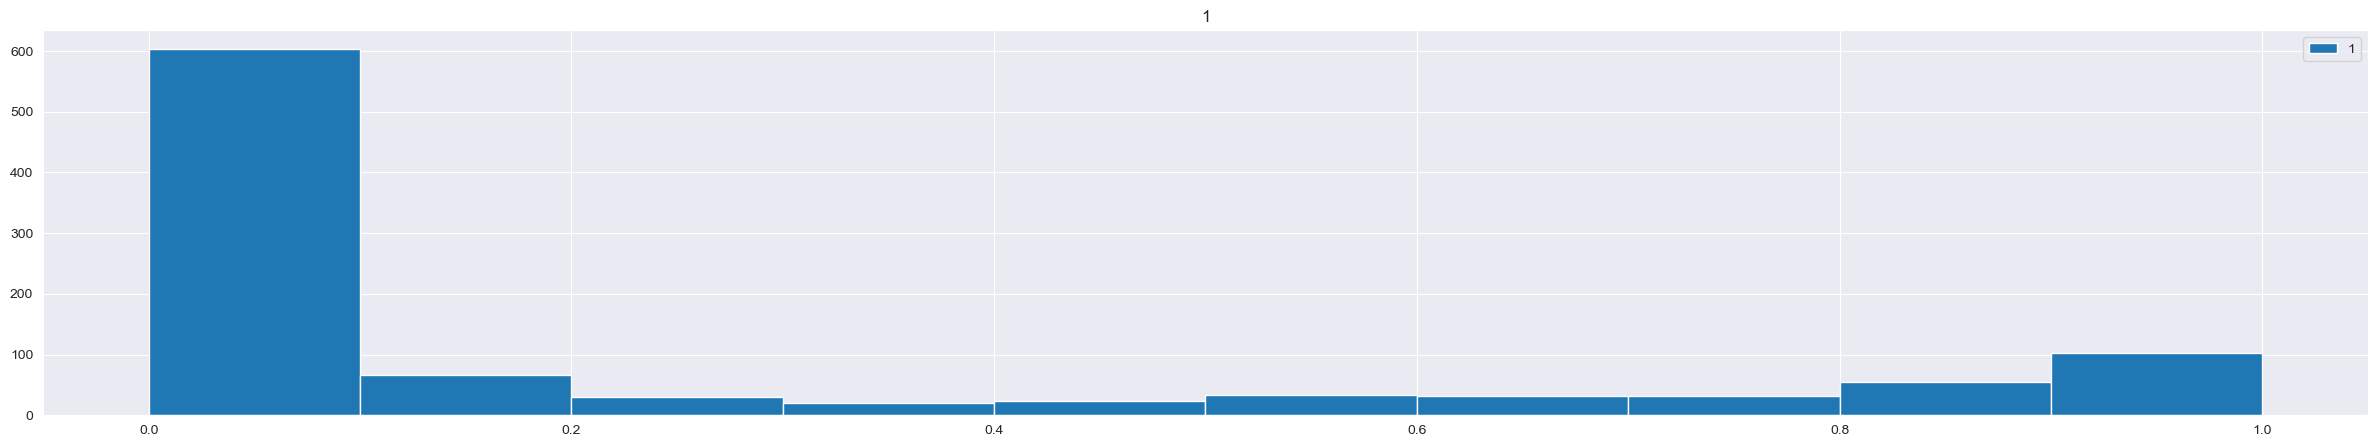

In [14]:
import seaborn as sns
result.drop(columns='0').hist(figsize=(30, 5))

# Получим топ 3 важных признака (что влияло больше всего на то, что человек оформит депозит)

**Определим метод, который получает индексы признаков каждой категории:**

In [91]:
def get_feature_indexes(cols, features):
    indexes = []
    for feature in features:
        ind = list(cols).index(feature)
        indexes.append(ind)
    return indexes

**Определим метод, который получает долю важности признаков при прогнозе для конкретного пользователя**

In [92]:
from sklearn.preprocessing import MinMaxScaler

def get_importance(df, feature_importance_, ID, feature_ind):
    values = df.loc[ID].values[feature_ind]
    importance = feature_importance_[feature_ind]
    res = pd.DataFrame(values * importance, columns=['importance'])
    res.index = df.loc[ID].iloc[feature_ind].index
    scaler = MinMaxScaler()
    res['importance'] = scaler.fit_transform(res['importance'].values.reshape(-1, 1))

    return res.sort_values(by=['importance'])

**Выделим бинарные, количественные и числовые признаки:**

In [93]:
bin_f = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'pdays']
count_f = ['age', 'month', 'day_of_week']
num_f = ['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


**Получим важность признаков модели:**

In [94]:
fi = model.model.feature_importances_
imp_test = test_data.drop(columns='y')

In [105]:
bin_f_ind = get_feature_indexes(imp_test.columns, bin_f)
count_f_ind = get_feature_indexes(imp_test.columns, count_f)
num_f_ind = get_feature_indexes(imp_test.columns, num_f)

ID = 6605  # 323, 6605
bin_f_imp = get_importance(imp_test, fi, ID, bin_f_ind)
count_f_imp = get_importance(imp_test, fi, ID, count_f_ind)
num_f_imp = get_importance(imp_test, fi, ID, num_f_ind)

print('Бинарные признаки:\n', bin_f_imp.iloc[len(bin_f_imp) - 3 :len(bin_f_imp)])
print('Количественные признаки:\n', count_f_imp.iloc[len(count_f_imp) - 3 :len(count_f_imp)])
print('Числовые признаки:\n', num_f_imp.iloc[len(num_f_imp) - 3 :len(num_f_imp)])

# print(bin_f_imp)
# print(count_f_imp)
# print(num_f_imp)

Бинарные признаки:
          importance
contact    0.857095
marital    0.990786
housing    1.000000
Количественные признаки:
              importance
age            0.000000
day_of_week    0.708638
month          1.000000
Числовые признаки:
                 importance
cons.price.idx    0.009339
duration          0.526836
nr.employed       1.000000
